# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)


shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

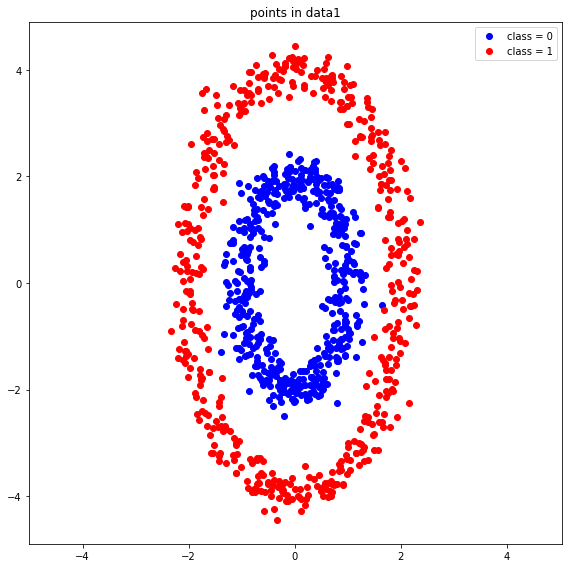

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

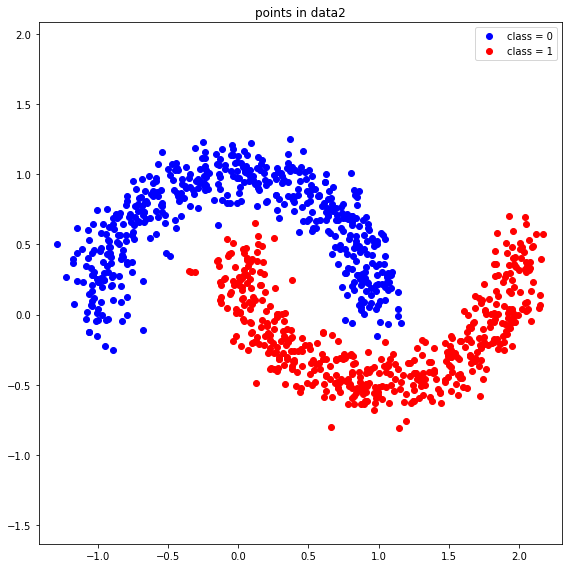

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [14]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
   
    t1=(x-np.mean(x))/np.max(x-np.mean(x))
    t2=(y-np.mean(y))/np.max(y-np.mean(y))
    t3=np.power(t1,2)+np.power(t2,2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t3)
    #return feature
print(compute_feature1(data1_point))


(1, array([0.12900878, 0.1382319 , 0.18795007, 0.22061845, 0.27020394,
       0.09997353, 0.31205938, 0.17246457, 0.18090531, 0.07454565,
       0.1486016 , 0.23597341, 0.21655046, 0.16173777, 0.11427238,
       0.0954938 , 0.24165847, 0.23062336, 0.26846601, 0.19405662,
       0.27907773, 0.07439084, 0.24972699, 0.18979467, 0.11059809,
       0.3247692 , 0.21677572, 0.18316116, 0.06836288, 0.3173331 ,
       0.17428236, 0.16726242, 0.09488227, 0.20086112, 0.26298163,
       0.17401865, 0.15987384, 0.21181576, 0.17279708, 0.18307379,
       0.30204471, 0.2277598 , 0.15087726, 0.20497188, 0.18919544,
       0.19832581, 0.13400746, 0.15619597, 0.1799077 , 0.07052933,
       0.21398254, 0.23672914, 0.17902462, 0.15135424, 0.30777678,
       0.17849362, 0.21825562, 0.1400531 , 0.25994245, 0.11786818,
       0.1689942 , 0.1842548 , 0.16266362, 0.2313205 , 0.20856665,
       0.14509351, 0.13448782, 0.13670402, 0.26178919, 0.21876783,
       0.26381881, 0.19279884, 0.28073474, 0.1279867 , 0.2

In [18]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    x = x-(max(x)+min(x))/2
    x= x/max(x)
    y= y-(max(y)+min(y))/2
    y= y/max(y)
    
    a= np.power((x+1),2) +np.power((np.max(y)-y),2)
    b= np.power((x-1/3),2) +np.power((np.max(y)-y),2)
    c=np.power((x+1/3),2) +np.power((np.min(y)-y),2)
    d=np.power((x-1),2) +np.power((np.min(y)-y),2)
    k= np.zeros(len(point))
    for i in range(len(point)):
        k[i]=min(c[i],d[i])-min(a[i],b[i])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,k.T)
    #return feature
print(compute_feature2(data2_point))

(1, array([-0.77012741, -0.54359535, -0.72584991, -0.16865834, -0.63400839,
       -0.06419208, -0.30538978,  0.2243091 ,  0.26115809, -0.32059287,
       -0.16987421, -0.11753261, -0.81971075,  0.28209059, -0.41324181,
       -1.04760838,  0.11561157,  0.06416513,  0.39765798, -0.77957396,
        0.41265986,  0.51311731,  0.37220486,  0.43275946,  0.89234482,
       -0.28722029,  0.37893258,  0.6986119 , -0.05090036, -0.17604157,
        0.44069554,  1.54226368,  0.11481427,  0.4127217 ,  0.64141687,
       -0.37356917, -0.50129029,  0.20155737,  0.62376355, -0.06201627,
        0.1444381 ,  0.91459956, -0.28221312,  0.52728161,  0.12865416,
        1.25652565, -0.22701146,  1.19380949,  0.49502748,  0.56966144,
        1.19161839,  0.6841788 ,  0.44084828,  0.25317043,  1.16471391,
        0.63458202,  1.595408  ,  0.53530668,  0.67548431,  0.3285209 ,
        0.74481821,  0.95426475,  1.4793375 ,  0.57810102,  0.19056655,
        1.28653217,  1.17112238,  0.94314259,  2.00568242,  

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [38]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    #value = theta[0]*feature[0]+theta[1]*feature[1]
    value = np.dot(theta,feature)
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value#.shape #len(theta), len(feature)
print(compute_linear_regression((0,1),compute_feature1(data2_point)))

(1000,)


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## define sigmoid function with input

- $z \in \mathbb{R}$

In [8]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 
sigmoid(compute_linear_regression((0,1),compute_feature1(data2_point)))

array([0.52602225, 0.55185072, 0.55271521, 0.52017734, 0.54477461,
       0.52925238, 0.53156593, 0.52968484, 0.53143006, 0.52154775,
       0.52979258, 0.51755489, 0.53212118, 0.51279771, 0.52385596,
       0.56043435, 0.5105013 , 0.52052678, 0.51581581, 0.56202748,
       0.52476211, 0.50663091, 0.52071468, 0.52803802, 0.52321732,
       0.51956349, 0.51646396, 0.53278412, 0.53172961, 0.52450007,
       0.52976602, 0.53497554, 0.53811327, 0.52239225, 0.52824976,
       0.5473119 , 0.5286088 , 0.50919231, 0.53135734, 0.50932847,
       0.51684043, 0.51482136, 0.52601478, 0.50714645, 0.50586583,
       0.52183946, 0.51974383, 0.52182395, 0.51451625, 0.52839337,
       0.51816078, 0.52936099, 0.51233641, 0.51840971, 0.52582185,
       0.52181265, 0.54050482, 0.51140089, 0.51543015, 0.52684363,
       0.50718442, 0.52558363, 0.52808758, 0.51328047, 0.52202104,
       0.52560698, 0.53393947, 0.52167877, 0.55500484, 0.50891569,
       0.52429721, 0.51659015, 0.51121635, 0.51715354, 0.56362

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [9]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
print(compute_logistic_regression(np.zeros(2), compute_feature1(data1_point)))

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [19]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
compute_residual((0,0),compute_feature1(data1_point),data1_label)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [21]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
compute_loss((0,0),compute_feature1(data1_point),data1_label)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0.6931471805599454

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [32]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h_i=compute_logistic_regression(theta, feature)
    t1=(h_i-label)
    t2=np.asarray(feature).T
    k=np.dot(t2,t1)
    gradient = (k)/len(label) ## point summation point*(hi-label)/n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient
print(compute_gradient((0,0),compute_feature1(data1_point),data1_label))

ValueError: shapes (2,) and (1000,) not aligned: 2 (dim 0) != 1000 (dim 0)

## compute the accuracy of the prediction for point with a given model parameter

In [ ]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    len_point= len(feature)
    for i in range(len_point):
        if t[i] >0.5:
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        

    accuracy = count/len_point

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
compute_accuracy(np.zeros(2), compute_feature2(data2_point),data2_label)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


1.0

## initialize the gradient descent algorithm

In [ ]:
data1_number_iteration   = 100
data2_number_iteration   = 100 

data1_learning_rate   = 0.1 
data2_learning_rate   = 0.1 

data1_number_feature    = 2
data2_number_feature    = 2 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [ ]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature1 = compute_feature1(data1_point)
    loss=compute_loss(theta1, feature1, data1_label)
    
    theta1      = theta1-data1_learning_rate*compute_gradient(theta1, feature1, data1_label)
    loss1       =loss
    accuracy1   = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


AttributeError: 'tuple' object has no attribute 'T'

In [ ]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    theta2      = 
    loss2       =
    accuracy2   = 

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

___

## functions for presenting the results

___

___

In [ ]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [ ]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [ ]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [ ]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [ ]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [ ]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [ ]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

In [ ]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)

**************************************************
## [RESULT 01]
**************************************************


NameError: name 'data1_loss_iteration' is not defined